In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
# ==============================
# Load Dataset & Explore
# ==============================
df = pd.read_csv("NYC_Airbnb_2019.csv")  # replace with actual path
df.columns = df.columns.str.strip().str.replace(' ', '_')  # clean column names

# Quick overview
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [3]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
# ==============================
# 3️⃣ Handle Missing Values
# ==============================
# Fill 'reviews_per_month' missing values with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Fill 'last_review' with a placeholder
df['last_review'] = df['last_review'].fillna('No Review')

# Fill host_name and name missing values with 'Unknown'
df['host_name'] = df['host_name'].fillna('Unknown')
df['name'] = df['name'].fillna('Unknown')

# Check remaining missing values
print(df.isnull().sum())


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [5]:
# ==============================
# 4️⃣ Remove Duplicates
# ==============================
print("Duplicate rows before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Rows after removing duplicates:", df.shape[0])


Duplicate rows before removal: 0
Rows after removing duplicates: 48895


In [7]:
# ==============================
# 5️⃣ Standardize Columns
# ==============================
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Convert price to numeric (already int but ensure clean)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Strip whitespace in categorical columns
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip()
df['neighbourhood'] = df['neighbourhood'].str.strip()
df['room_type'] = df['room_type'].str.strip()


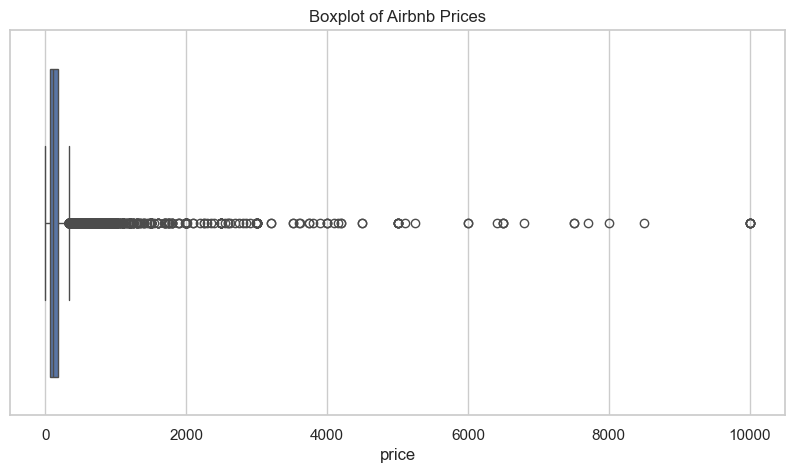

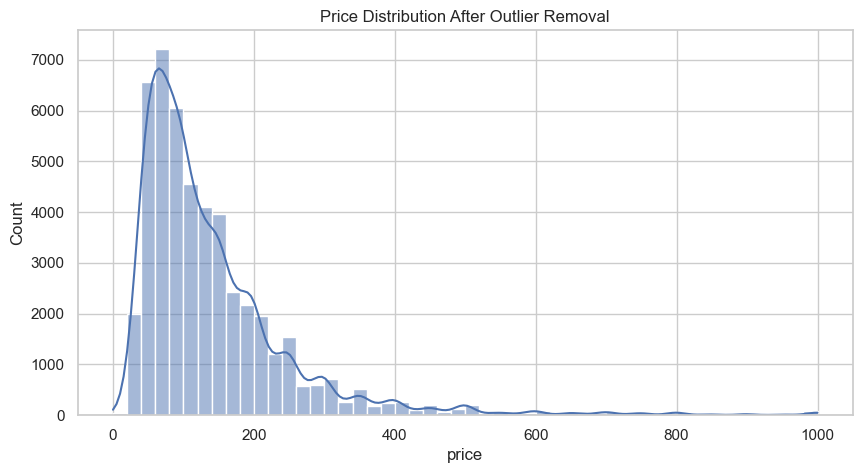

In [8]:
# ==============================
# 6️⃣ Detect & Handle Outliers
# ==============================
# Visualize price distribution
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Airbnb Prices")
plt.show()

# Remove extreme outliers (price > $1000)
df = df[df['price'] <= 1000]

# Check distribution after removal
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution After Outlier Removal")
plt.show()


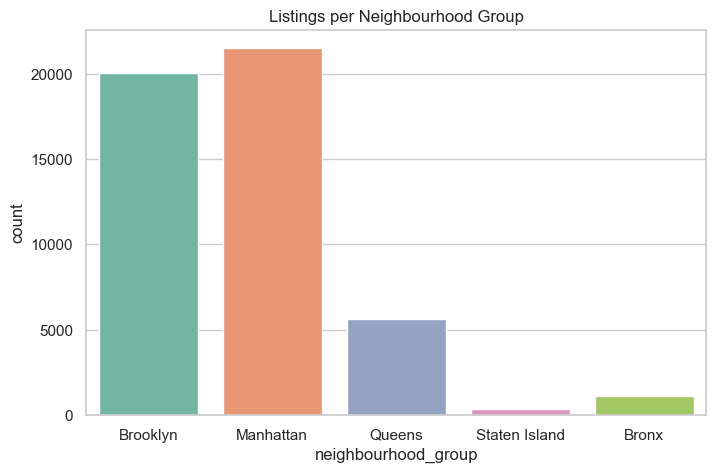

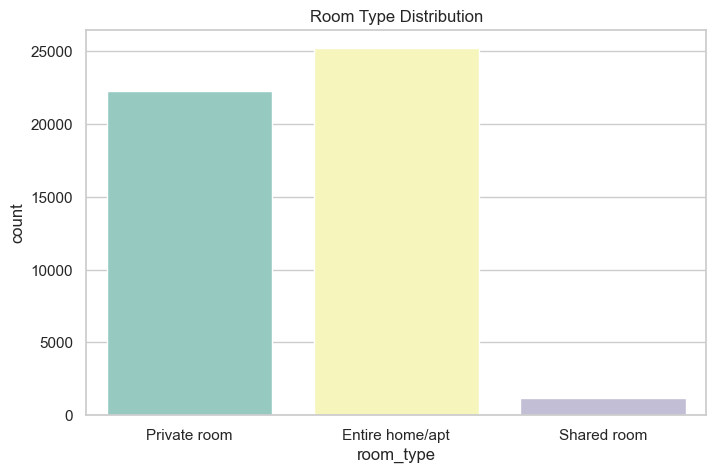

In [10]:
# ==============================
# 7️⃣ Explore Key Features (Updated)
# ==============================
# Listings per neighbourhood group
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood_group', palette='Set2', hue='neighbourhood_group', dodge=False)
plt.title("Listings per Neighbourhood Group")
plt.legend([],[], frameon=False)  # hide legend
plt.show()

# Room type distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type', palette='Set3', hue='room_type', dodge=False)
plt.title("Room Type Distribution")
plt.legend([],[], frameon=False)
plt.show()



In [11]:
# ==============================
# 8️ Summary of Cleaned Dataset
# ==============================
print("Cleaned dataset shape:", df.shape)
print(df.info())
print(df.describe())


Cleaned dataset shape: (48656, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 48656 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48656 non-null  int64  
 1   name                            48656 non-null  object 
 2   host_id                         48656 non-null  int64  
 3   host_name                       48656 non-null  object 
 4   neighbourhood_group             48656 non-null  object 
 5   neighbourhood                   48656 non-null  object 
 6   latitude                        48656 non-null  float64
 7   longitude                       48656 non-null  float64
 8   room_type                       48656 non-null  object 
 9   price                           48656 non-null  int64  
 10  minimum_nights                  48656 non-null  int64  
 11  number_of_reviews               48656 non-null  int64  
 12  la

In [13]:
# ==============================
# 7️ Recommendations
# ==============================

print("Recommendations based on the cleaned NYC Airbnb dataset:")

recommendations = [
    "1 Cap extreme values for 'price' and 'minimum_nights' to avoid skewed analyses and misleading insights.",
    "2️ Standardize text columns such as 'neighbourhood' and 'room_type' for consistency in reporting and visualizations.",
    "3️ Use the cleaned dataset for further analysis, like pricing trends, occupancy patterns, or host performance evaluation.",
    "4️ Monitor and regularly update missing values, especially in 'last_review' and 'reviews_per_month', to maintain dataset quality over time.",
    "5️ Explore correlations between features (e.g., price vs. reviews_per_month) for data-driven decision making."
]

for rec in recommendations:
    print(rec)


Recommendations based on the cleaned NYC Airbnb dataset:
1 Cap extreme values for 'price' and 'minimum_nights' to avoid skewed analyses and misleading insights.
2️ Standardize text columns such as 'neighbourhood' and 'room_type' for consistency in reporting and visualizations.
3️ Use the cleaned dataset for further analysis, like pricing trends, occupancy patterns, or host performance evaluation.
4️ Monitor and regularly update missing values, especially in 'last_review' and 'reviews_per_month', to maintain dataset quality over time.
5️ Explore correlations between features (e.g., price vs. reviews_per_month) for data-driven decision making.
